# Superstore API
Time series predictions for the Superstore dataset.

## Goal
Predict sales amount for a given time frame.

# Exploratory Data Analysis
This notebook covers the exploratory data analysis from the dataset.

## Imports
This notebook requires the following packages. Make sure you have them installed in order to use this notebook.

In [1]:
import pandas as pd

## Default variables
Define default variables for the notebook.

In [2]:
ROOT_FOLDER = os.path.split(os.getcwd()[:-1])[0]
RAW_DATA_FOLDER = os.path.join(ROOT_FOLDER, "data", "raw")
PROCESSED_DATA_FOLDER = os.path.join(ROOT_FOLDER, "data", "processed")

## Load data
The dataset is in the `data\raw` folder.

In [3]:
DATASET_FILE_NAME = "dataset.csv"

data = pd.read_csv(os.path.join(RAW_DATA_FOLDER, DATASET_FILE_NAME), index_col="Row ID")
print(f"Number of rows = {data.shape[0]}")
data.head()

Number of rows = 9994


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Missing Values
Check for missing values in the dataset.

In [4]:
data.isna().sum(axis=0)

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Great! There are no missing values.

## Dates
Dates are stored as object. Let's convert it.

In [5]:
data["Order Date"] = pd.to_datetime(data["Order Date"], format="%d-%m-%y")

data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


We'll sum sales by order date.

In [6]:
series = data.groupby("Order Date").sum()["Sales"]

## Data Viz
Visualize data.

<AxesSubplot:xlabel='Order Date'>

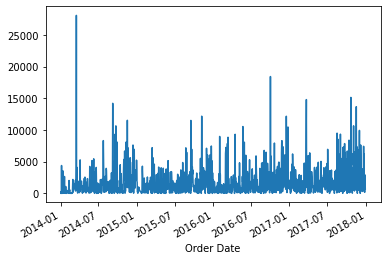

In [7]:
series.plot()

The signal is very noisy. The rolling mean can help us on that.

<AxesSubplot:xlabel='Order Date'>

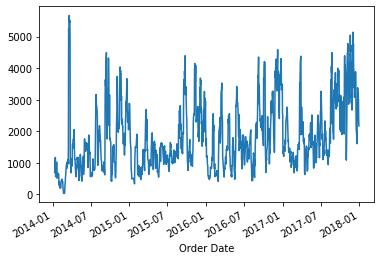

In [8]:
series.rolling(7).mean().plot()

## Save Data
The data is ready to move on to the next stage.

In [9]:
PROCESSED_DATASET_FILE_NAME = "dataset.csv"

series.to_csv(os.path.join(PROCESSED_DATA_FOLDER, PROCESSED_DATASET_FILE_NAME))